# Resumen breve de Scrapy y ventajas frente a Selenium

## ¿Qué es Scrapy?

Scrapy es un framework de código abierto escrito en Python, diseñado específicamente para la extracción de datos estructurados de sitios web (web scraping). Permite construir arañas (spiders) que navegan, extraen y procesan datos de manera eficiente y automática.

---

## Ventajas de Scrapy sobre Selenium

| Característica           | Scrapy                                | Selenium                             |
|--------------------------|---------------------------------------|--------------------------------------|
| **Enfoque**              | Scraping puro (HTTP, HTML, JSON, etc) | Automatización de navegador real     |
| **Velocidad**            | Muy rápido (peticiones asíncronas)    | Más lento (carga y renderizado real) |
| **Consumo de recursos**  | Bajo                                  | Alto (abre navegadores)              |
| **Escalabilidad**        | Muy alta                              | Limitada por recursos                |
| **Manejo de datos**      | Nativo (exporta a CSV, JSON, etc)     | Requiere procesamiento adicional     |
| **Uso de JavaScript**    | Limitado*                             | Total (renderizado real)             |
| **Facilidad de despliegue** | Fácil (headless, servidores, etc.)  | Más complejo (requiere GUI/navegador)|

\* Scrapy puede integrarse con Splash o Puppeteer para JS, pero no es su enfoque principal.

---

## ¿Cuándo usar Scrapy?

- **Extracción rápida y masiva** de datos de páginas que no requieren interacción compleja con JavaScript.
- Cuando se necesita **procesar grandes volúmenes de páginas** de forma eficiente.
- Para proyectos de scraping profesional, escalable y mantenible.
---

## Resumen

- **Scrapy** es ideal para scraping rápido, masivo y eficiente de sitios estáticos o semi-dinámicos.
- **Selenium** es mejor cuando necesitas controlar un navegador real o interactuar con elementos complejos de la web.


# Código usando scrapy para obtener noticias
1. Se va a realizar webscraping de la pagina Gestion.pe
2. Se va a a obetener información del 01.01.2025 al 30.05.205
3. Existen consideraciones para correr scrapy, por lo que no se puede correr de forma sencilla en un notebook

## Consideraciones
# Pasos para correr un proyecto con Scrapy

### 1. Crear el proyecto Scrapy

En la terminal, navega a la carpeta donde deseas tu proyecto y ejecuta:
```bash
scrapy startproject nombre_proyecto
```

### 2. Crear un spider
Entra en la carpeta del proyecto:

```bash
cd nombre_proyecto
```
Crea un spider dentro de la carpeta spiders:

```bash
scrapy genspider gestionSpider gestion.pe
```

### 3. Editar el spider
Abre el archivo generado en nombre_proyecto/spiders/gestionSpider.py y edita las reglas de extracción según tus necesidades.


### 4. Ejecutar el spider
Desde la raíz del proyecto, ejecuta:

```bash
scrapy crawl nombre_spider
```

## 5. Guardar los resultados (opcional)
Puedes exportar los datos a JSON, CSV, XML, etc. agregando la opción -o:

```bash
scrapy crawl nombre_spider -o resultados.json
```

In [1]:
import scrapy


class GestionspiderSpider(scrapy.Spider):
    name = "gestionspider"
    allowed_domains = ["gestion.pe"]
    start_urls = ["https://gestion.pe/archivo/"]


    def parse(self, response):
        articles = response.css('.story-item__title')
        for new in articles:
            relative_url = new.attrib['href']

            if relative_url is not None:
                new_url = 'https://gestion.pe/' + relative_url

                yield response.follow(new_url, callback = self.parse_new_page)

        next_page = response.css('.pagination-date a').attrib['href']

        if (next_page is not None) and (next_page != '/archivo/todas/2025-01-01/'):
            next_page_url = 'https://gestion.pe/' + next_page
            yield response.follow(next_page_url, callback = self.parse)

            # yield{
            #     'title': new.css('h2 a::text').get(),
            #     'category': new.css('.story-item__section::text').get(),
            #     'summit': new.css('.story-item__section').attrib['href'],
            #     'date': new.css('.story-item__date-time::text').get(),
            #     'url': new.css('.story-item__section').attrib['href'],
            # }

    def parse_new_page(self,response):

        content = response.css('.story-contents__font-paragraph')
        description_list = []

        for paragraph in content:
            description_list.append(''.join(paragraph.css('::text').getall()))

        description = '\n'.join(description_list)

        tags = response.css('.st-tags__box h4 a::text').getall()

        tags = [tag for tag in tags if tag.strip() != ""]

        yield{
            'title': response.css('.sht__title::text').get(),
            'category' :  response.css('.sht__title__section a::text').get(),
            'summit' : response.css('.sht__summary::text').get(),
            'description': description,
            'date': response.css('.s-aut__time time::attr(datetime)').get(),
            'autor': response.css('.s-aut__n-row a::text').get(),
            'tags': str(tags),
            'url': response.url,
        }

In [2]:
import pandas as pd
import numpy as np

In [19]:
news = pd.read_json('gestionspider4.json')

In [20]:
news.head()

,title,category,summit,description,date,autor,tags,url
0,"APN: Puerto del Callao espera US$ 2,300 millon...",Economía,Autoridad portuaria señala que la mayoría de o...,Hace 26 años se iniciaron las concesiones de p...,2025-06-01 05:10:00-05:00,Elías García Olano,"['puertos en Perú', 'general', 'puerto del Cal...",https://gestion.pe/economia/apn-puerto-del-cal...
1,"Dólar en S/ 3.62, ¿a quiénes les convendría co...",Tu Dinero,La tendencia no fue lineal en mayo pues inició...,El billete verde vuelve a cerrar un mes a la b...,2025-06-01 05:10:00-05:00,Zulema Ramirez Huancayo,"['dólar', 'Tu dinero', 'tipo de cambio', 'vola...",https://gestion.pe/tu-dinero/dolar-en-s-362-a-...
2,Luego de tiendas de Parque Cánepa: esta es la ...,Empresas,Municipalidad de La Victoria evalúa nuevo espa...,La Victoria es uno de los distritos más resalt...,2025-06-01 06:00:00-05:00,Mayumi García,"['La Victoria', 'empresas', 'Parque Cánepa', '...",https://gestion.pe/economia/empresas/luego-de-...
3,Agro es alcanzada por la criminalidad en miner...,Economía,La Asociación de Gremios Productores Agrarios ...,Las alarmas permanecen encendidas en el sector...,2025-06-01 05:26:00-05:00,Camila Vera,"['agro', 'General', 'AGAP', 'Chavimochic', 'Ch...",https://gestion.pe/economia/agro-es-alcanzada-...
4,"Ahorro crece, ¿está generando ganancias a peru...",Tu Dinero,Detrás del sólido comportamiento en el ahorro ...,El ahorro de los peruanos se sigue expandiendo...,2025-06-01 05:10:00-05:00,Zulema Ramirez Huancayo,"['ahorro', 'Tu dinero', 'rentabilidad', 'depós...",https://gestion.pe/tu-dinero/ahorro-crece-esta...


In [ ]:
news['category'].unique()  # erase nan category

array(['Economía', 'Tu Dinero', 'Empresas', 'Tendencias',
       'Management & Empleo', 'Mercados', 'Reportaje', None, 'Perú',
       'Política', 'EEUU', 'Lifestyle', 'Finanzas Personales',
       'Internacional', 'México', 'Tecnología', 'Inmobiliarias', 'Mundo',
       'G de Gestión', 'Opinión', 'Aviso Contratado', 'Columnistas',
       'Publirreportaje', 'Casos de estudio', 'Infografías', 'Estilos',
       'Tecnología y Ciencia', 'Viajes', 'Editorial'], dtype=object)

In [ ]:
# Delete None categories
news = news.loc[~news['category'].isna(),:]

/tmp/ipykernel_58405/2623488365.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  news['year_month'] = news['date'].dt.to_period('M')


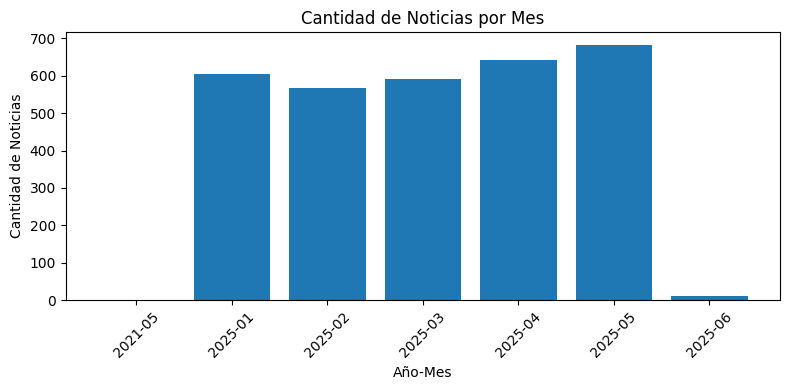

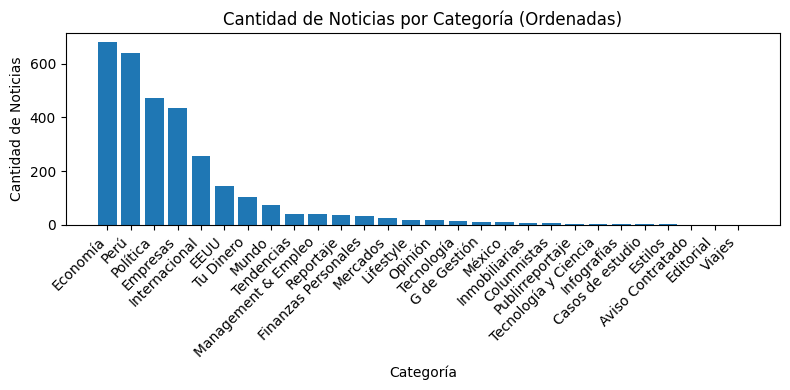

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame se llama df
news['date'] = pd.to_datetime(news['date'])
news['year_month'] = news['date'].dt.to_period('M')

# Cantidad de noticias por mes
noticias_por_mes = news.groupby('year_month').size().reset_index(name='cantidad_noticias')

plt.figure(figsize=(8,4))
plt.bar(noticias_por_mes['year_month'].astype(str), noticias_por_mes['cantidad_noticias'])
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Noticias')
plt.title('Cantidad de Noticias por Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cantidad de noticias por categoría, ordenado de mayor a menor
noticias_por_categoria = (
    news.groupby('category').size()
    .reset_index(name='cantidad_noticias')
    .sort_values(by='cantidad_noticias', ascending=False)
)

plt.figure(figsize=(8,4))
plt.bar(noticias_por_categoria['category'].astype(str), noticias_por_categoria['cantidad_noticias'])
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias')
plt.title('Cantidad de Noticias por Categoría (Ordenadas)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
